In [1]:

import gc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
messages = pd.read_excel('../data/messages.xlsx')
M1 = messages[messages['ВИД_СООБЩЕНИЯ']=='M1']
M3 = messages[messages['ВИД_СООБЩЕНИЯ']=='M3']

print(len(M1))
print(len(M3))

83
898


In [15]:
# Наиболее частые аварии

pd.DataFrame({
    'M1': M1['НАЗВАНИЕ_ТЕХ_МЕСТА'].value_counts(),
    'M3': M3['НАЗВАНИЕ_ТЕХ_МЕСТА'].value_counts(),
    'Total': messages['НАЗВАНИЕ_ТЕХ_МЕСТА'].value_counts()
    }).rename_axis('ТЕХ_МЕСТО').sort_values(by='Total', ascending=False).head(25)

,M1,M3,Total
ТЕХ_МЕСТО,,,
КОРПУС ЭКСГ. №7,2.0,38.0,40
КОРПУС ЭКСГ. №6,NaN,36.0,36
РОТОР ЭКСГ. №8,7.0,28.0,35
ПОДШИПНИК ОПОРНЫЙ №2,1.0,34.0,35
РОТОР ЭКСГ. №7,4.0,29.0,33
РЕДУКТОР ГАЗ. ЗАДВИЖКИ ЭКСГ. №4,1.0,31.0,32
УЛИТА ЭКСГ. №4,NaN,30.0,30
ЭЛЕКТРОДВИГАТЕЛЬ ДСПУ-140-84-4 ЭКСГ. №5,4.0,25.0,29
ПОДШИПНИК ОПОРНЫЙ №1,5.0,21.0,26


In [21]:
# Наиболее частые причины аварий

pd.DataFrame({
    'M1': M1['ОПИСАНИЕ'].value_counts(),
    'M3': M3['ОПИСАНИЕ'].value_counts(),
    'Total': messages['ОПИСАНИЕ'].value_counts()
    }).rename_axis('Описание причины аварии').sort_values(by='Total', ascending=False).head(25)

,M1,M3,Total
Описание причины аварии,,,
утечка масла,NaN,56.0,56
Утечка масла.,NaN,38.0,38
течь масла,NaN,36.0,36
просос,NaN,24.0,24
Утечка масла,NaN,17.0,17
износ щеток,NaN,11.0,11
Течь масла,NaN,10.0,10
Прососы,NaN,7.0,7
Дефект подшипников.,NaN,7.0,7


In [3]:
del messages, M1, M3

In [31]:
def plot_and_clean(X_columns):
    '''Функция частичной загрузки данных для экономии памяти'''

    X_train = pd.read_parquet('../data/X_train.parquet', columns=X_columns)
    
    for col in X_train.columns:
        plt.figure(figsize=(11, 7))
        sns.lineplot(X_train[col])
        
    plt.figure(figsize=(4,3))
    sns.heatmap(X_train.corr(), annot=True)
    
    del X_train, X_columns
    gc.collect


**Все токи для одного эксгаустера:**  
ТОК РОТОРА 1 = ТОК РОТОРА2  
ТОК СТАТОРА содержит выбросы 6000 ед.

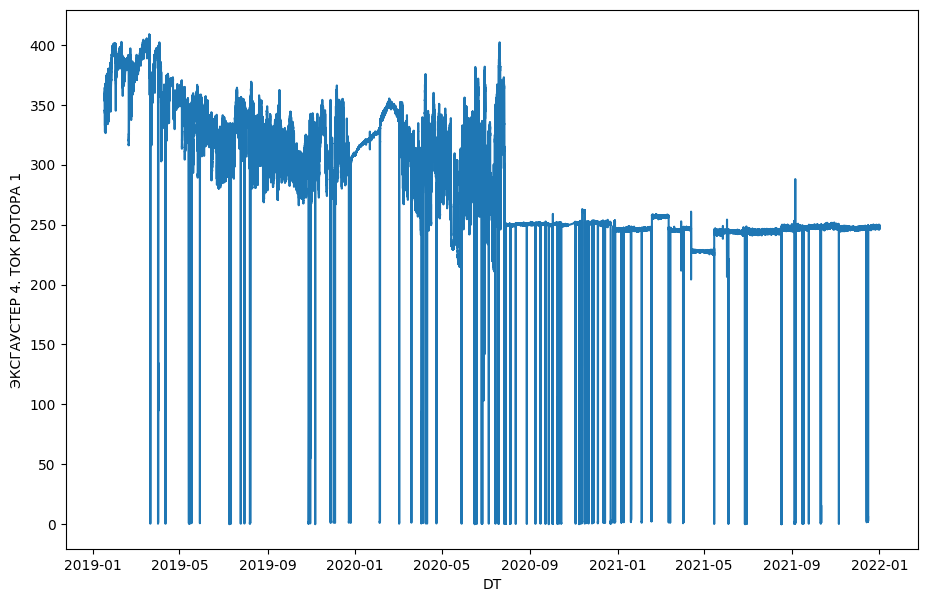

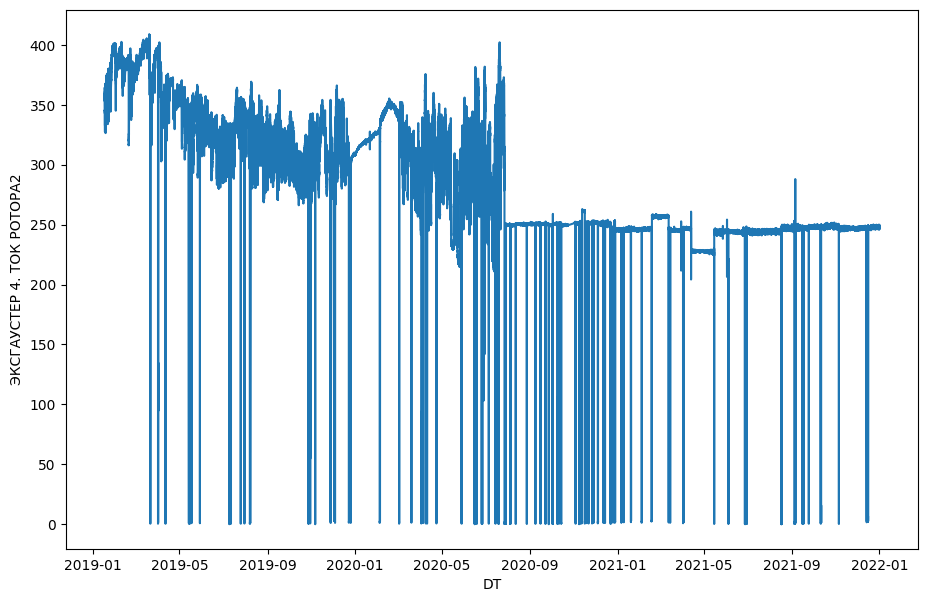

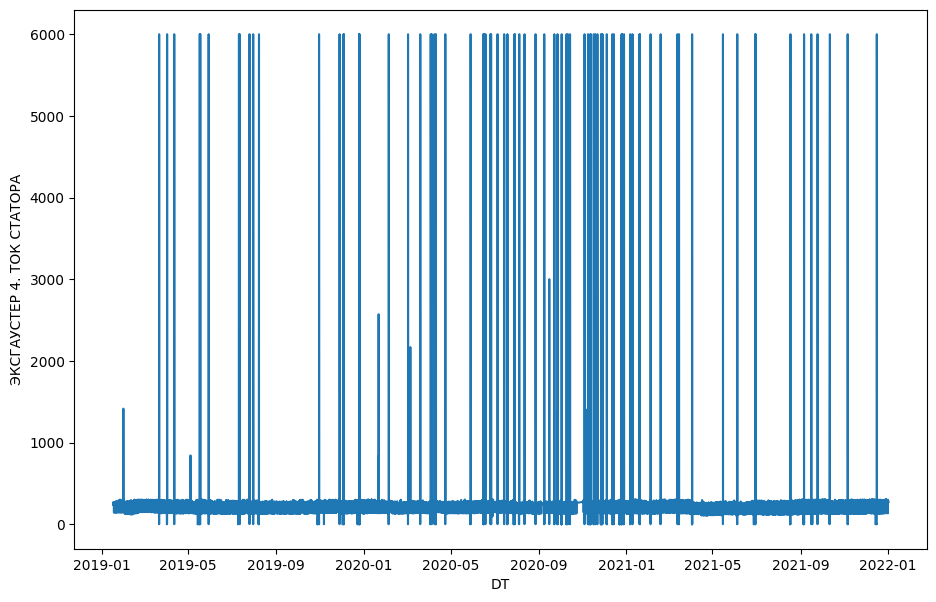

In [6]:
X_columns = [
    'ЭКСГАУСТЕР 4. ТОК РОТОРА 1',
    'ЭКСГАУСТЕР 4. ТОК РОТОРА2',
    'ЭКСГАУСТЕР 4. ТОК СТАТОРА']

plot_and_clean(X_columns)

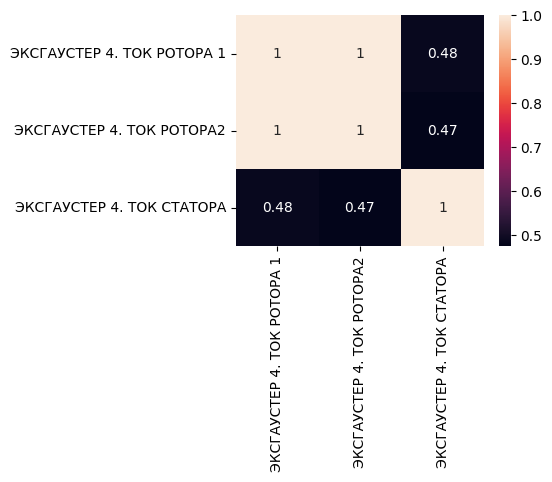

**Все температуры подшипников для одного эксгаустера**  
ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3 ≈ ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4

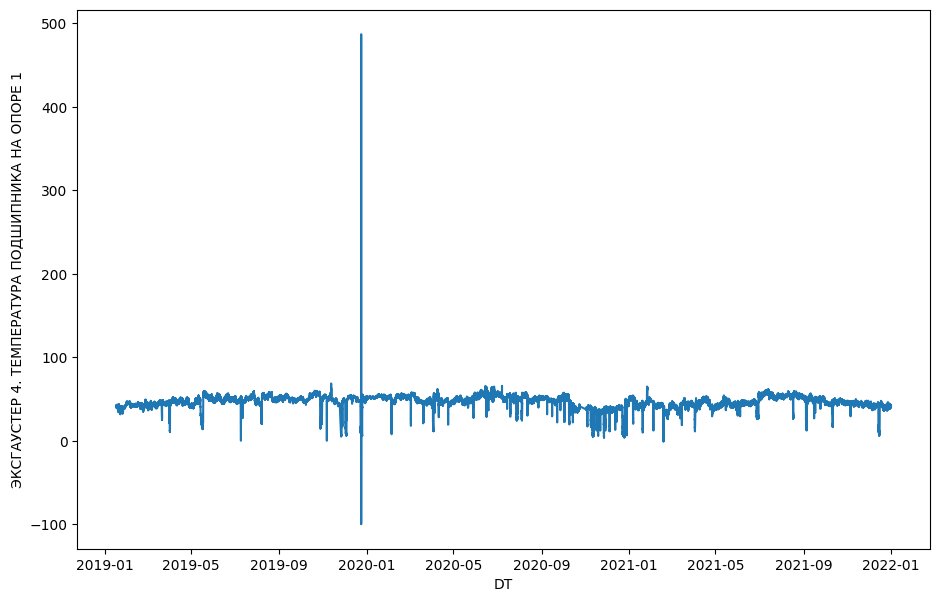

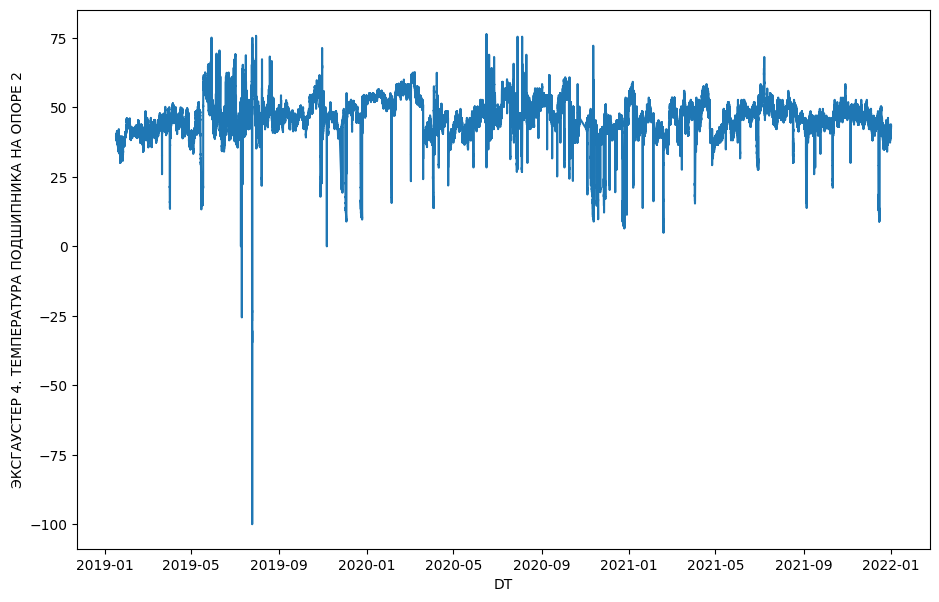

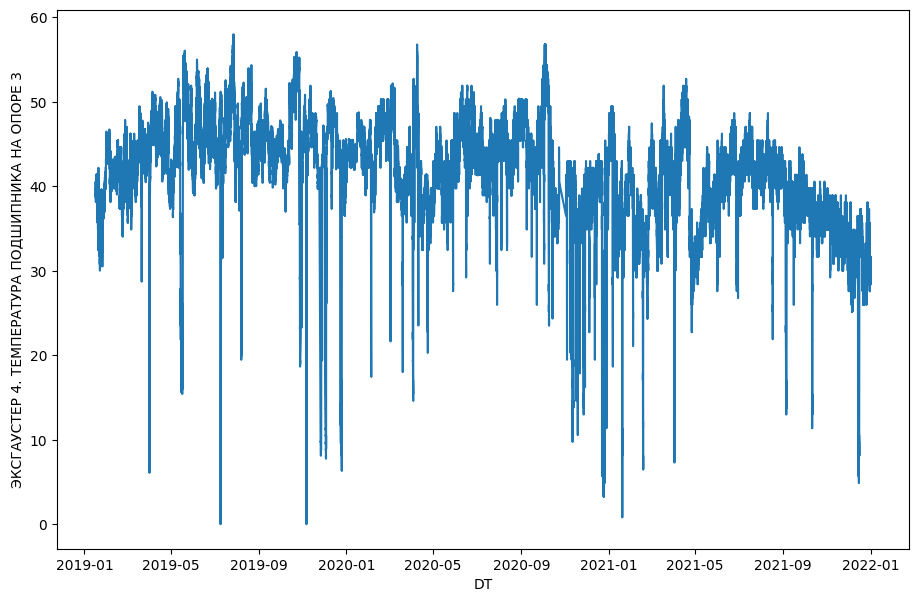

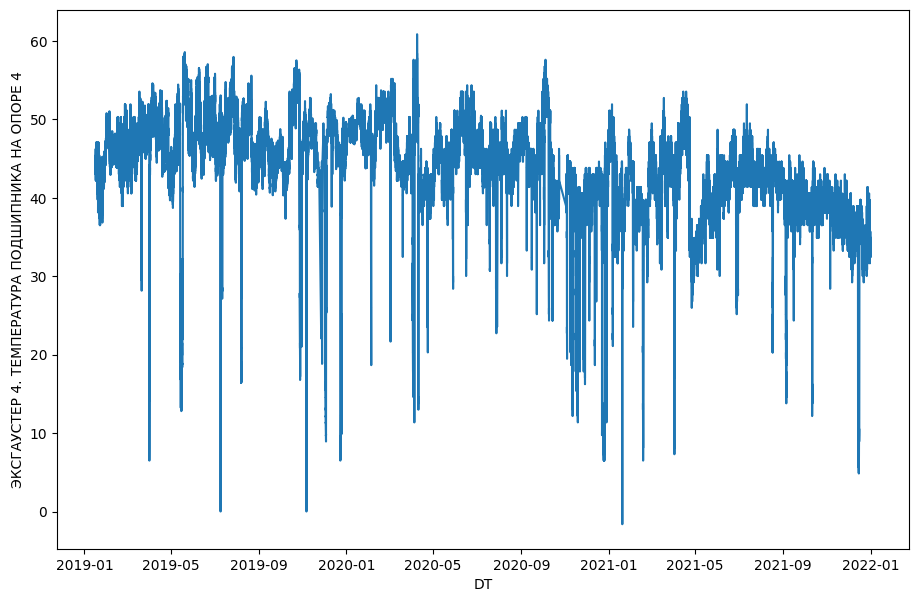

In [8]:
X_columns = [
    'ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1',
    'ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 2',
    'ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3',
    'ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4']

plot_and_clean(X_columns)

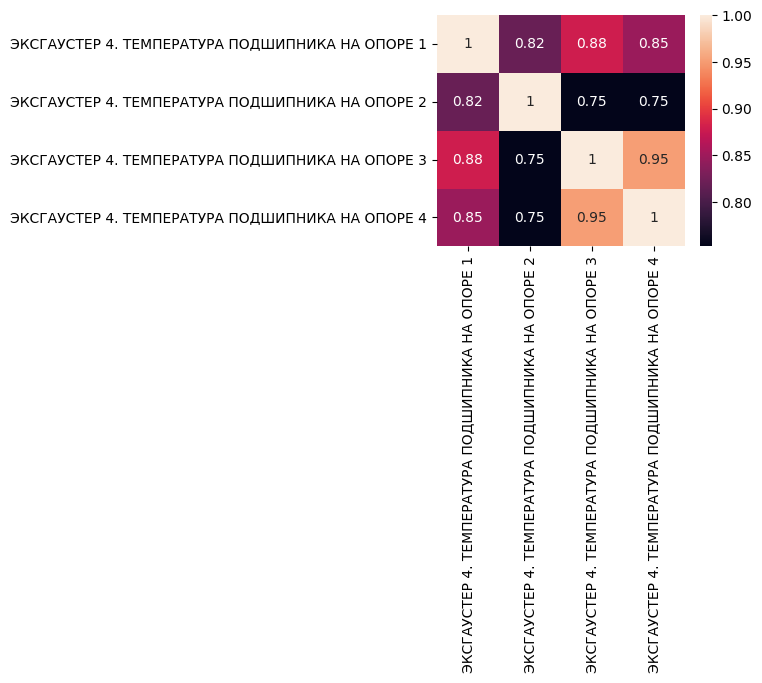

**Все вибрации для одного эксгаустера**  


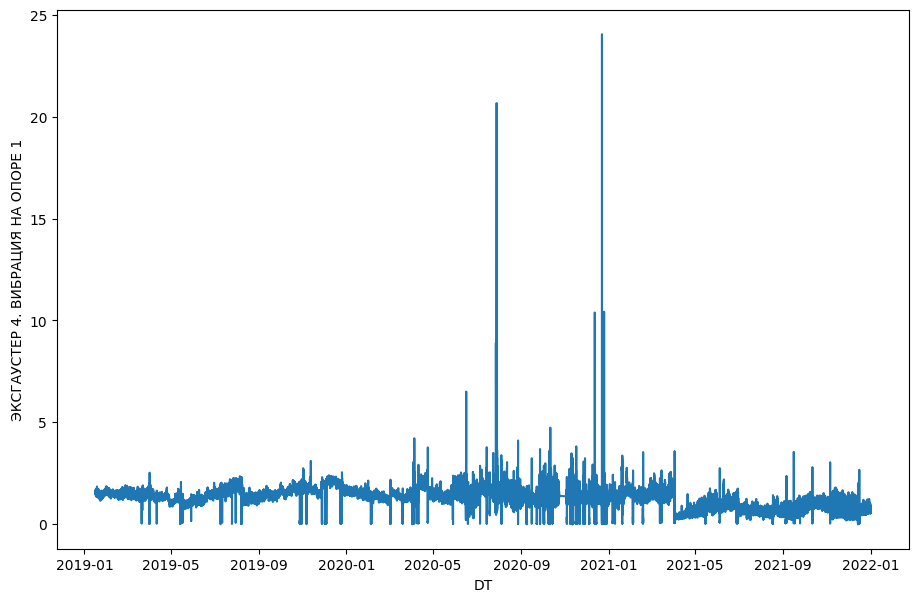

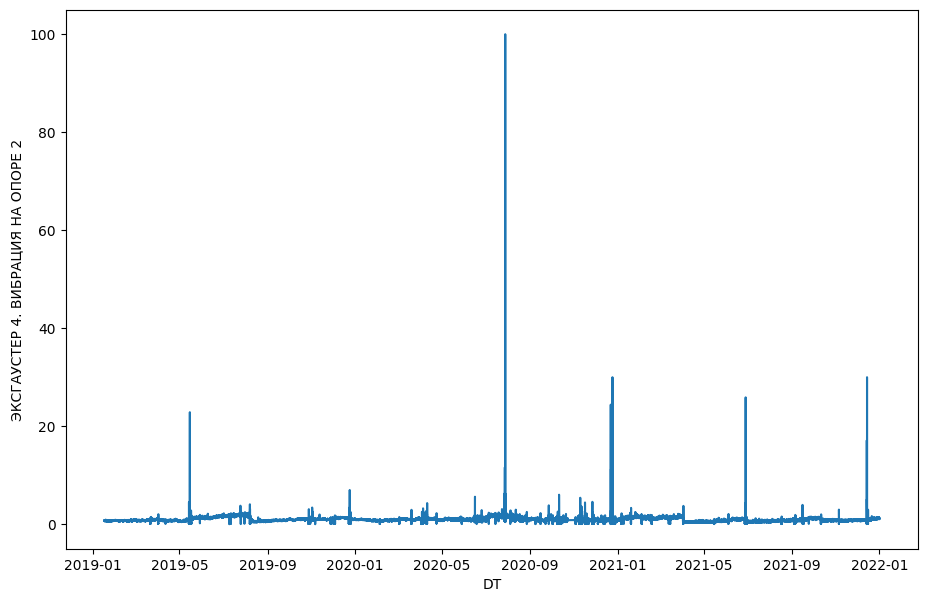

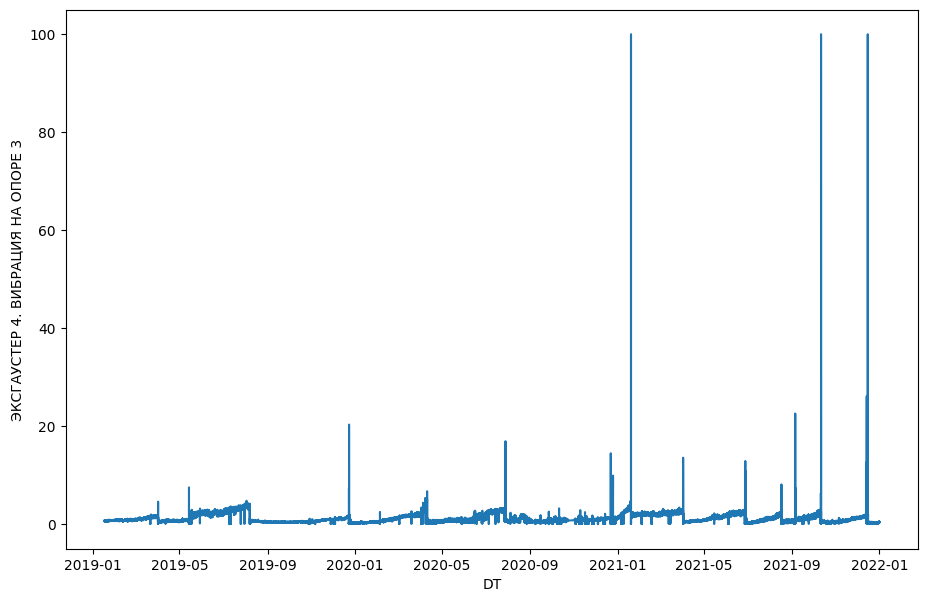

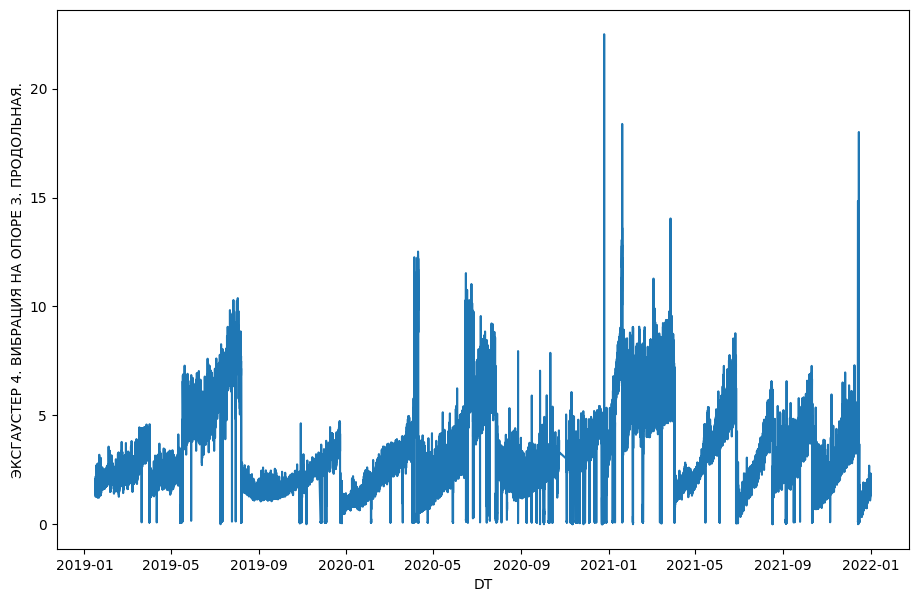

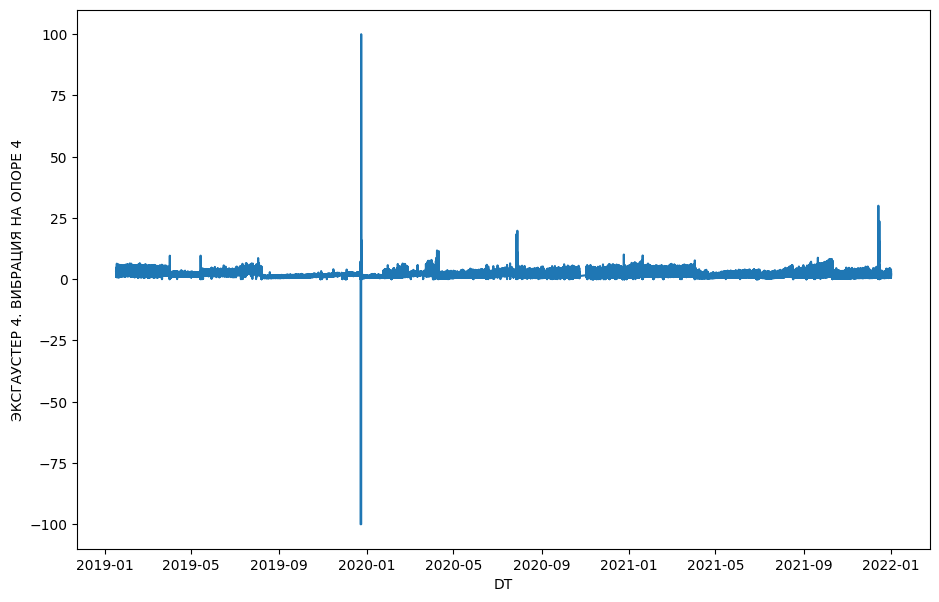

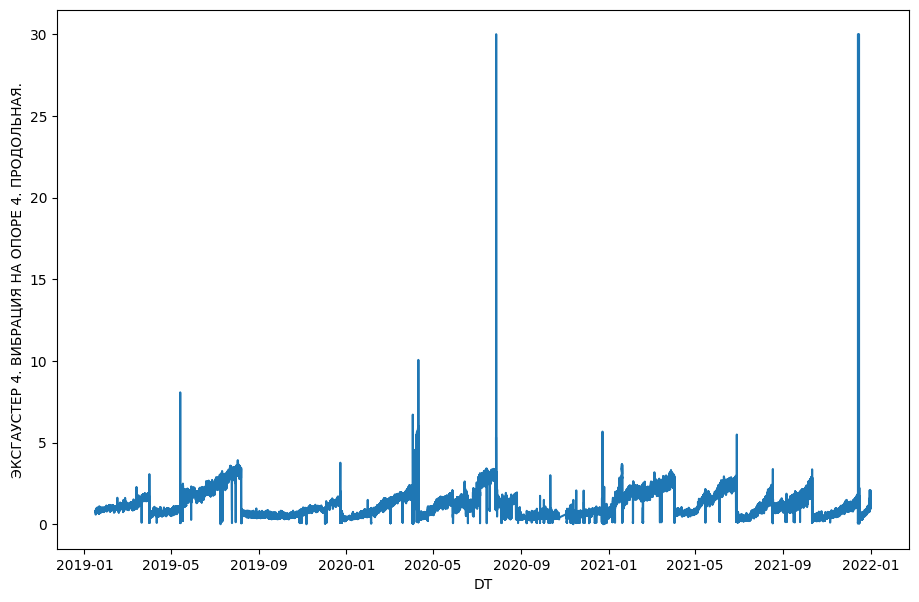

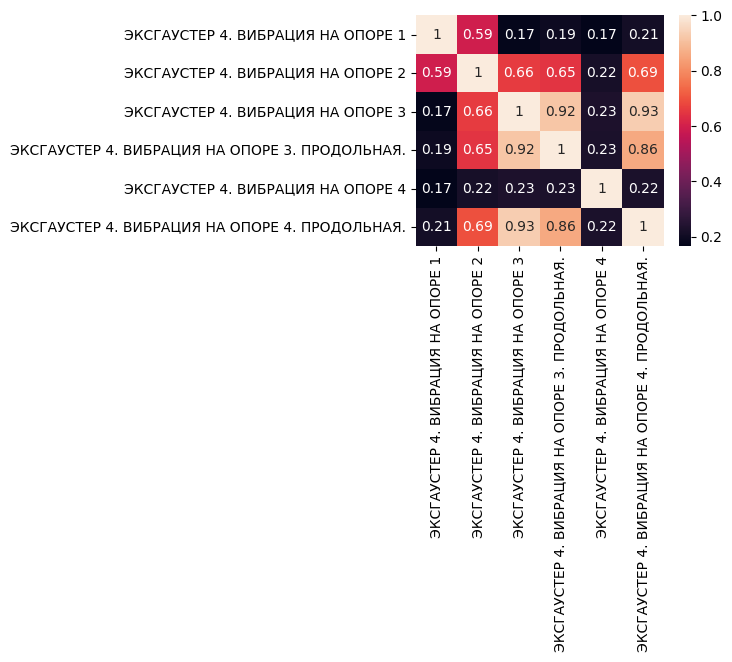

In [28]:
X_columns = [
    'ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 1',
    'ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 2',
    'ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3',
    'ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ.',
    'ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 4',
    'ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 4. ПРОДОЛЬНАЯ.']

plot_and_clean(X_columns)

**Все параметры масла для одного эксгаустера**

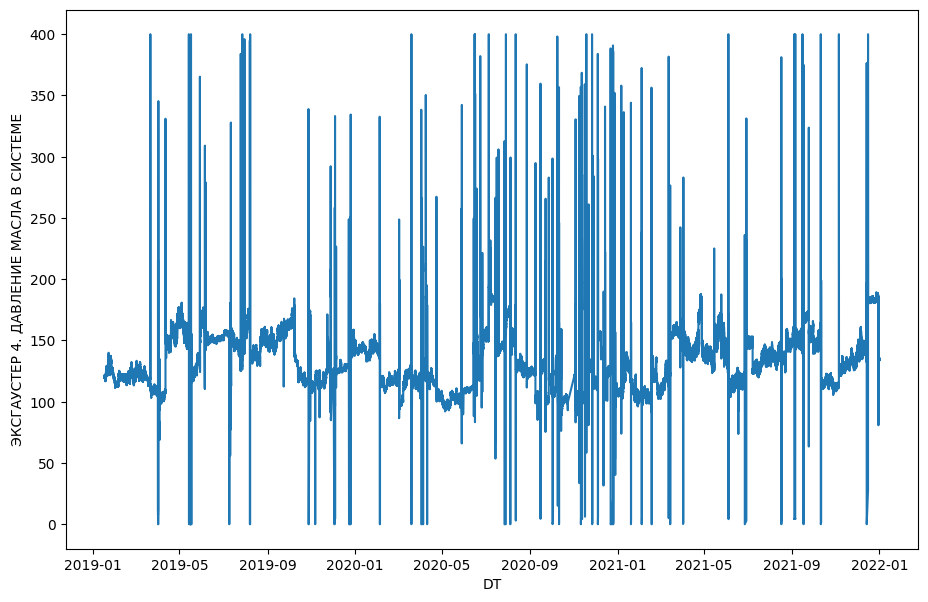

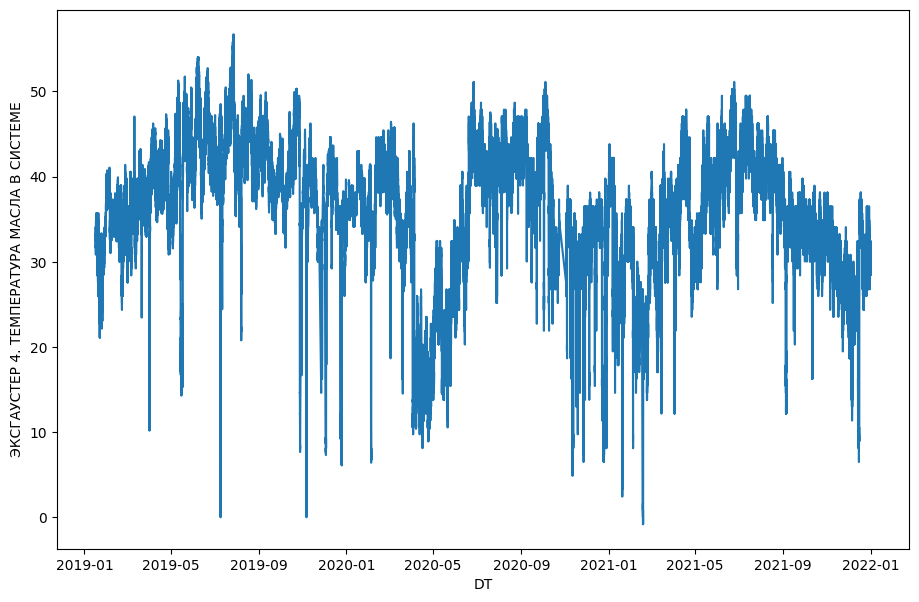

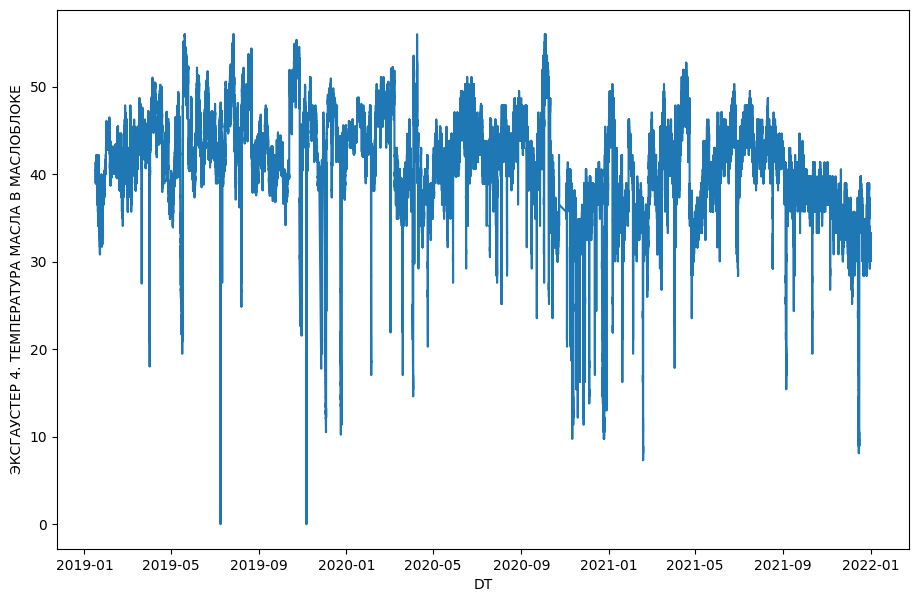

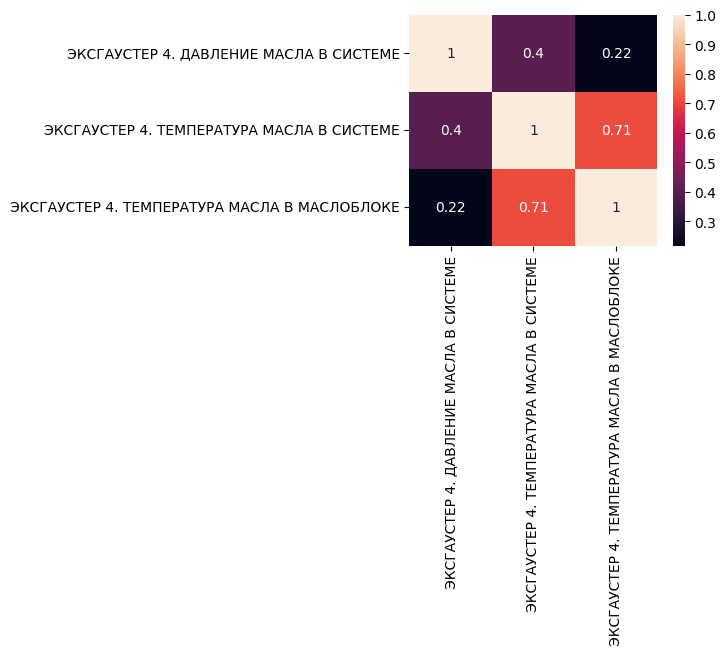

In [29]:
X_columns = [
    'ЭКСГАУСТЕР 4. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ',
    'ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В СИСТЕМЕ',
    'ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В МАСЛОБЛОКЕ']

plot_and_clean(X_columns)

**Ток ротора для разных эксгаустеров**

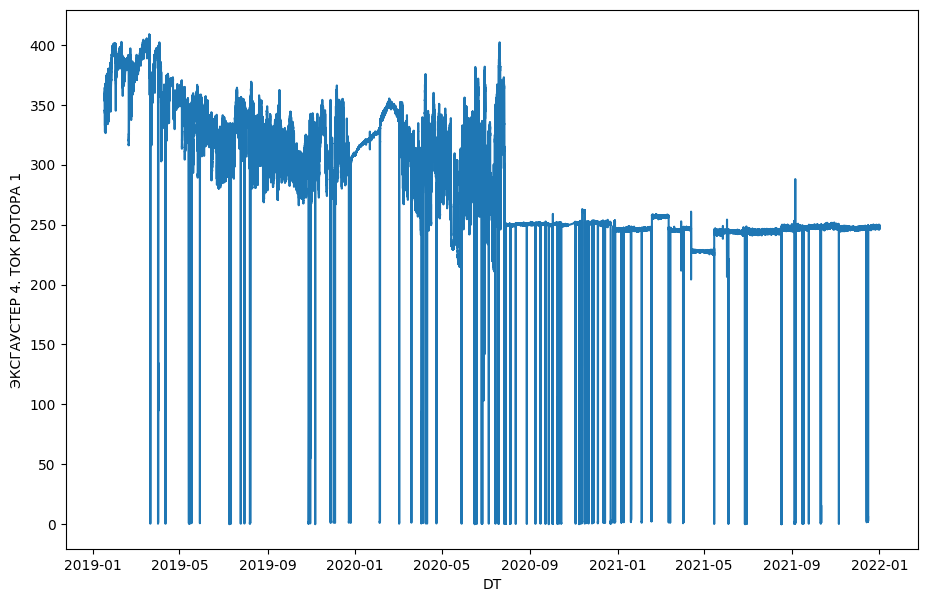

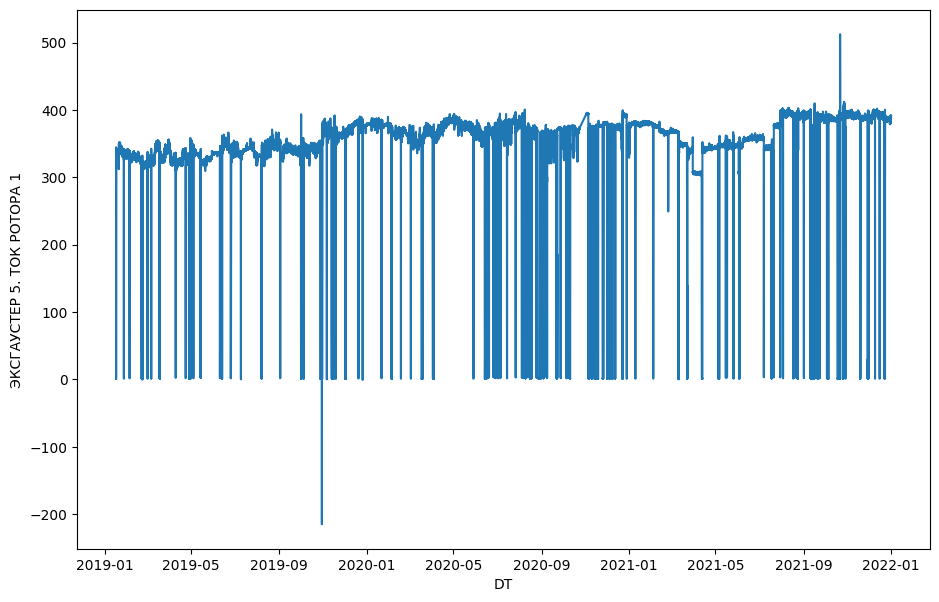

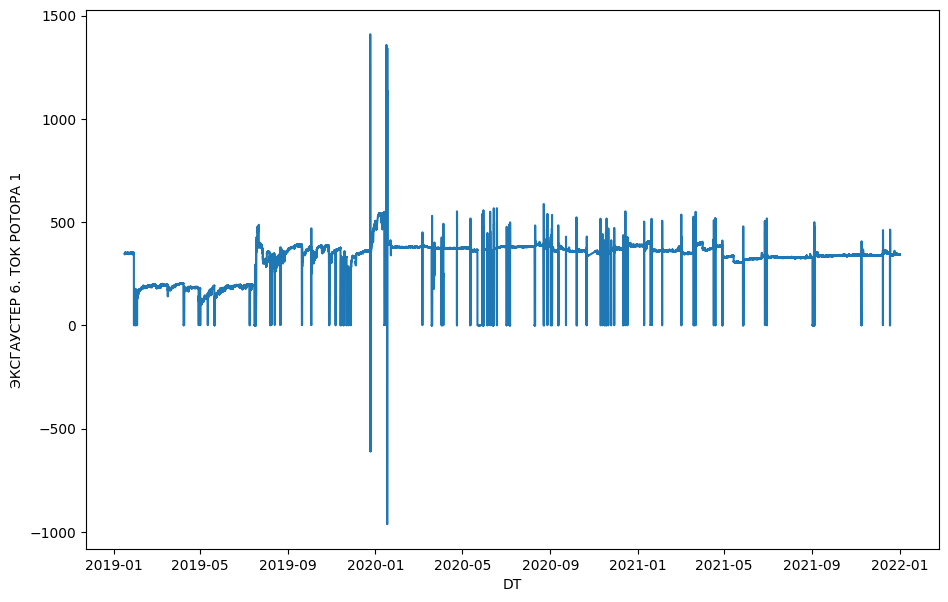

In [32]:
X_columns = [
    'ЭКСГАУСТЕР 4. ТОК РОТОРА 1',
    'ЭКСГАУСТЕР 5. ТОК РОТОРА 1',
    'ЭКСГАУСТЕР 6. ТОК РОТОРА 1']

plot_and_clean(X_columns)

In [47]:
def plot_and_clean_2(X_columns):
    '''Функция частичной загрузки данных для экономии памяти'''

    X_train = pd.read_parquet('../data/X_train.parquet', columns=X_columns)
    
    plt.figure(figsize=(11, 7))
    for col in X_train.columns:
        sns.lineplot(X_train[col].iloc[0:700000], label=col)
        
    del X_train, X_columns
    gc.collect

E:\Документы\Data Science\Projects\Equipment-Failure-Prediction\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
E:\Документы\Data Science\Projects\Equipment-Failure-Prediction\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


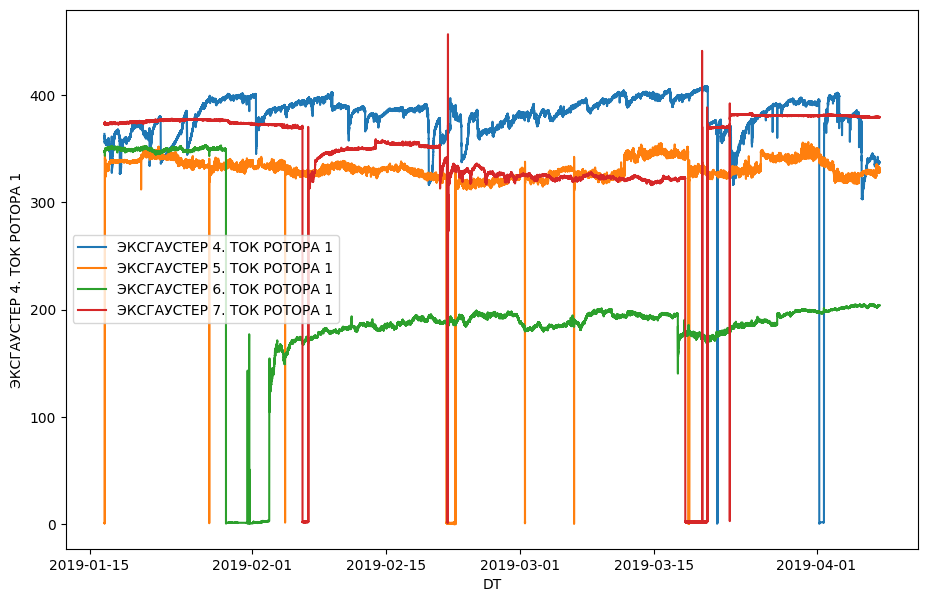

In [38]:
X_columns = [
    'ЭКСГАУСТЕР 4. ТОК РОТОРА 1',
    'ЭКСГАУСТЕР 5. ТОК РОТОРА 1',
    'ЭКСГАУСТЕР 6. ТОК РОТОРА 1',
    'ЭКСГАУСТЕР 7. ТОК РОТОРА 1']

plot_and_clean_2(X_columns)

**Температуры подшипников для разных эксгаустеров**

E:\Документы\Data Science\Projects\Equipment-Failure-Prediction\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
E:\Документы\Data Science\Projects\Equipment-Failure-Prediction\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


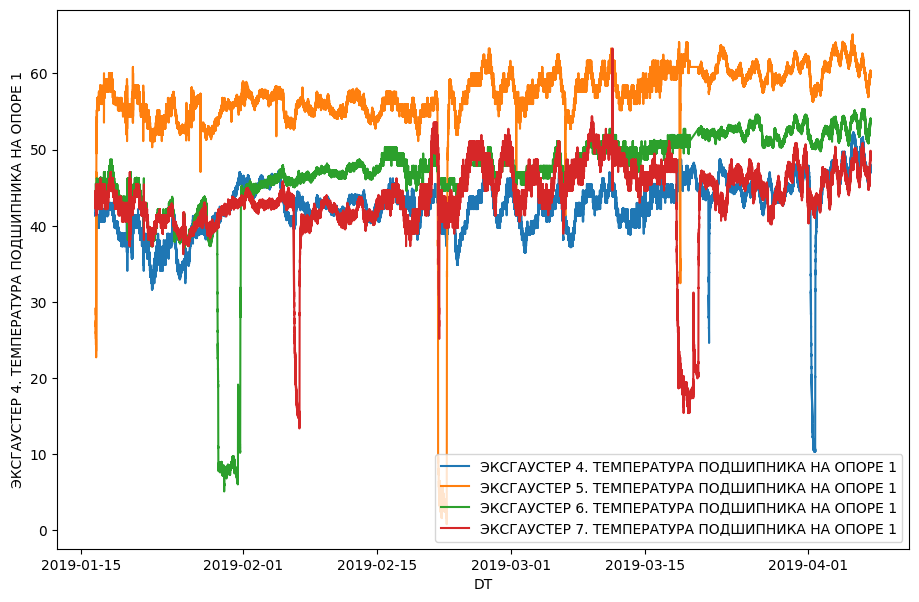

In [39]:
X_columns = [
    'ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1',
    'ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1',
    'ЭКСГАУСТЕР 6. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1',
    'ЭКСГАУСТЕР 7. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1']

plot_and_clean_2(X_columns)

E:\Документы\Data Science\Projects\Equipment-Failure-Prediction\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
E:\Документы\Data Science\Projects\Equipment-Failure-Prediction\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


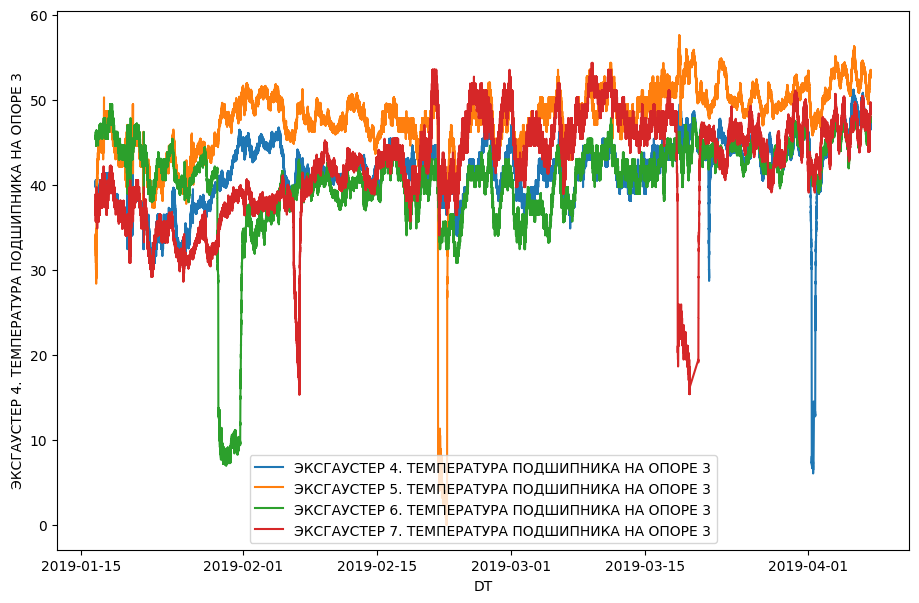

In [43]:
X_columns = [
    'ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3',
    'ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3',
    'ЭКСГАУСТЕР 6. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3',
    'ЭКСГАУСТЕР 7. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3']

plot_and_clean_2(X_columns)

**Вибрации для разных эксгаустеров**

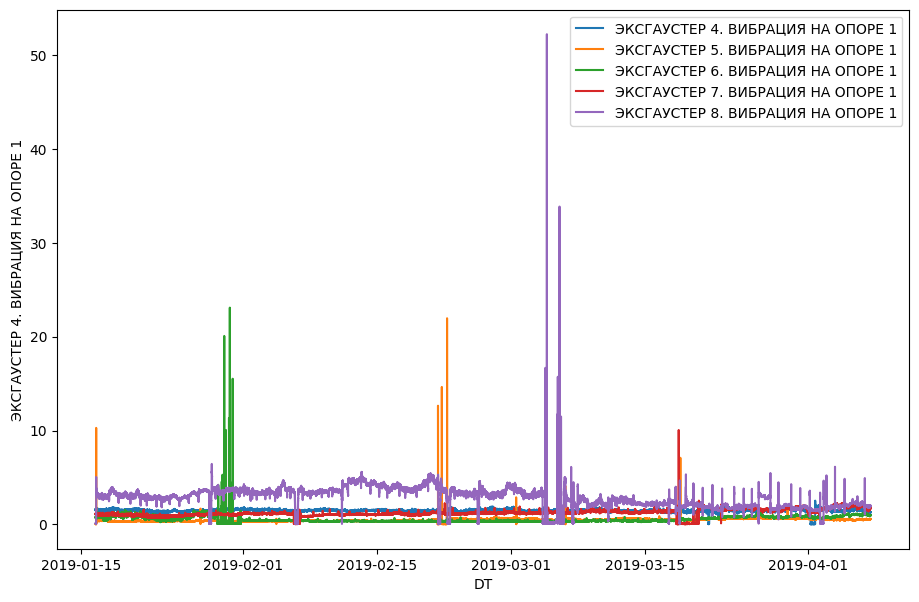

In [48]:
X_columns = [
    'ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 1',
    'ЭКСГАУСТЕР 5. ВИБРАЦИЯ НА ОПОРЕ 1',
    'ЭКСГАУСТЕР 6. ВИБРАЦИЯ НА ОПОРЕ 1',
    'ЭКСГАУСТЕР 7. ВИБРАЦИЯ НА ОПОРЕ 1',
    'ЭКСГАУСТЕР 8. ВИБРАЦИЯ НА ОПОРЕ 1']

plot_and_clean_2(X_columns)

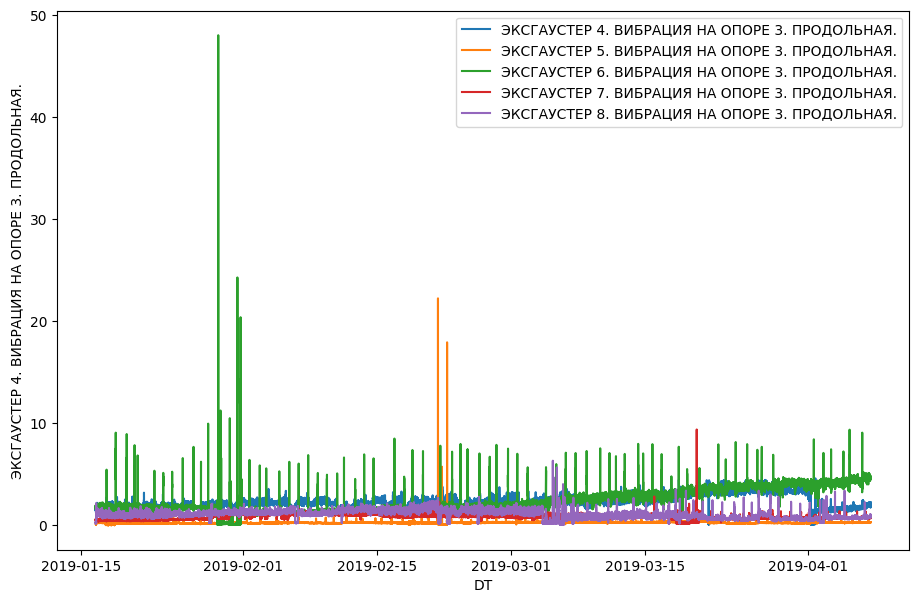

In [44]:
X_columns = [
    'ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ.',
    'ЭКСГАУСТЕР 5. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ.',
    'ЭКСГАУСТЕР 6. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ.',
    'ЭКСГАУСТЕР 7. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ.',
    'ЭКСГАУСТЕР 8. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ.']

plot_and_clean_2(X_columns)

В нескольких случаях пики вибраций связаны с неполадками электродвигателя

In [2]:
# Считывание y_columns из txt

y_columns = []
with open('../data/y_train_columns.txt', 'r') as file:
    for line in file:
        y_columns.append(line.rstrip('\n'))

In [5]:
# Для M1

def plot_distribution(n: int, y_columns: list):
    '''Распределение значений c авариями и без.'''

    X_columns = [
       f'ЭКСГАУСТЕР {n}. ТОК РОТОРА 1', f'ЭКСГАУСТЕР {n}. ТОК РОТОРА 2',
       f'ЭКСГАУСТЕР {n}. ТОК СТАТОРА', f'ЭКСГАУСТЕР {n}. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ',
       f'ЭКСГАУСТЕР {n}. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1',
       f'ЭКСГАУСТЕР {n}. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 2',
       f'ЭКСГАУСТЕР {n}. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3',
       f'ЭКСГАУСТЕР {n}. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4',
       f'ЭКСГАУСТЕР {n}. ТЕМПЕРАТУРА МАСЛА В СИСТЕМЕ',
       f'ЭКСГАУСТЕР {n}. ТЕМПЕРАТУРА МАСЛА В МАСЛОБЛОКЕ',
       f'ЭКСГАУСТЕР {n}. ВИБРАЦИЯ НА ОПОРЕ 1',
       f'ЭКСГАУСТЕР {n}. ВИБРАЦИЯ НА ОПОРЕ 2',
       f'ЭКСГАУСТЕР {n}. ВИБРАЦИЯ НА ОПОРЕ 3',
       f'ЭКСГАУСТЕР {n}. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ.',
       f'ЭКСГАУСТЕР {n}. ВИБРАЦИЯ НА ОПОРЕ 4',
       f'ЭКСГАУСТЕР {n}. ВИБРАЦИЯ НА ОПОРЕ 4. ПРОДОЛЬНАЯ.']
    y_columns_n = [column for column in y_columns if column.startswith(f'Y_ЭКСГАУСТЕР А/М №{n}')]
        
    X_train = pd.read_parquet('../data/X_train.parquet', columns=X_columns)
    y = pd.read_parquet('../data/y_train.parquet', columns=y_columns_n)
    
    # Разделяем индексы по поломкам в y
    M0_indx = y.loc[(y == 0).any(axis=1)].index   # без аварий
    M1_indx = y.loc[(y == 1).any(axis=1)].index   # авария с простоем
    # Разделяем Х_train по поломкам
    M0 = X_train.loc[M0_indx]
    M1 = X_train.loc[M1_indx]
    
    print('M0', M0.shape)
    print('M1', M1.shape)
        
    for col_m0, col_m1 in zip(M0.columns, M1.columns):
        df = pd.DataFrame({ 'M0': M0[col_m0].reset_index(drop=True), 'M1': M1[col_m1].reset_index(drop=True) })
        sns.boxplot(df)
        plt.ylabel(col_m0)
        plt.show()

    del X_train, X_columns, y
    plt.close('all')
    gc.collect
    

M0 (9335034, 16)
M1 (6258, 16)


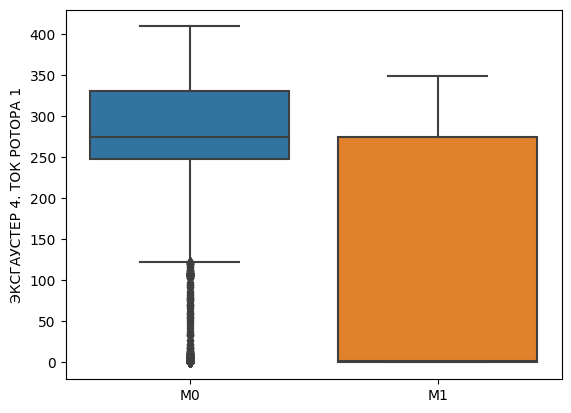

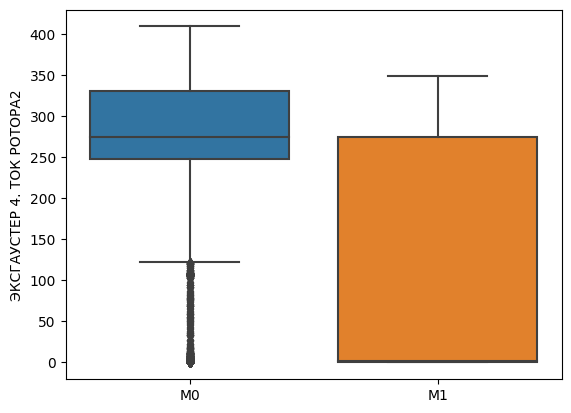

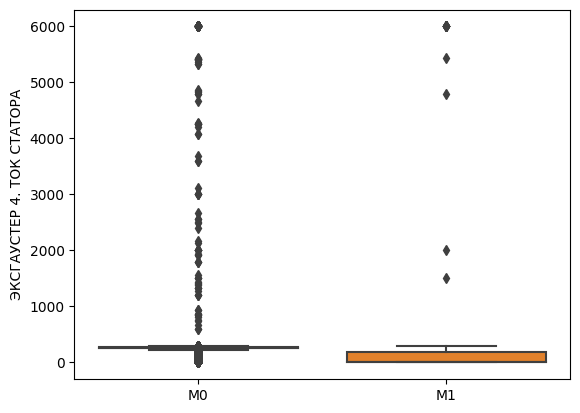

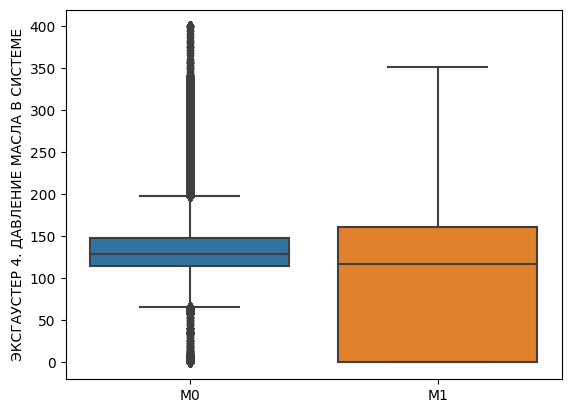

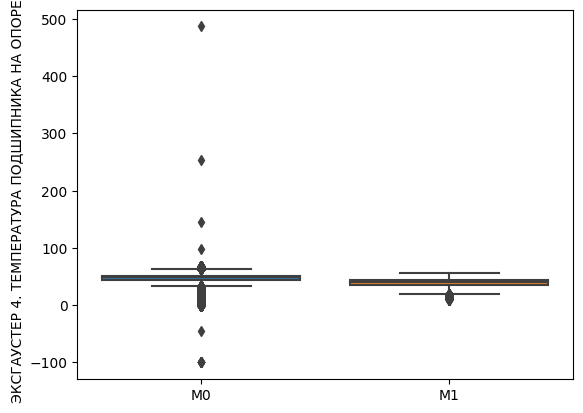

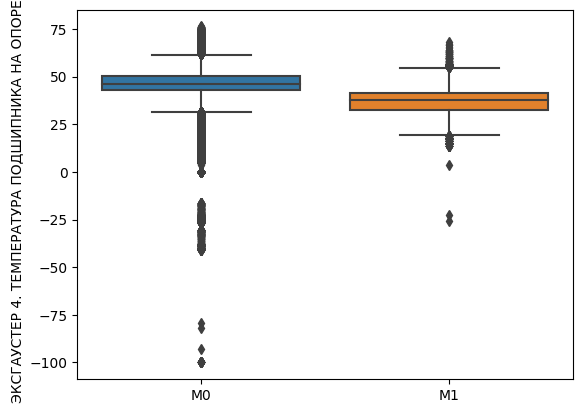

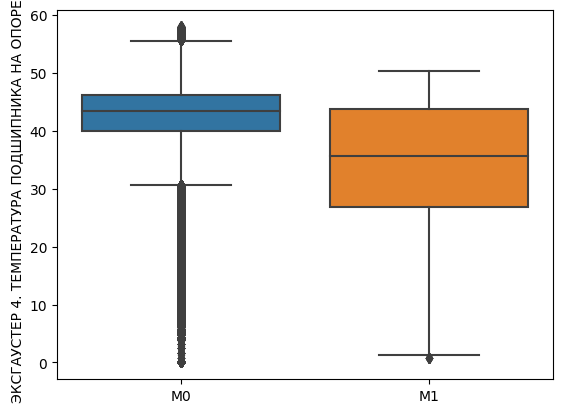

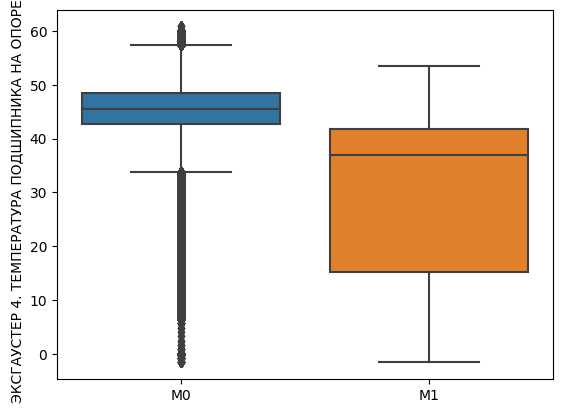

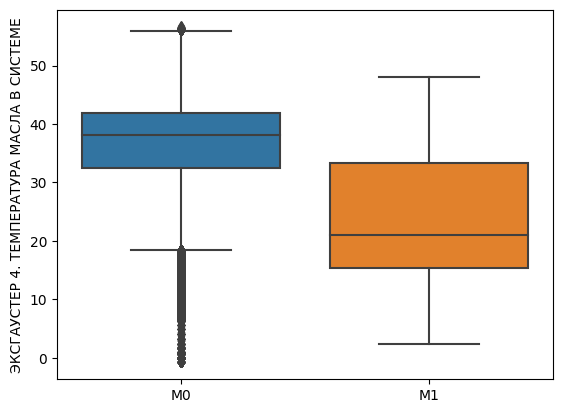

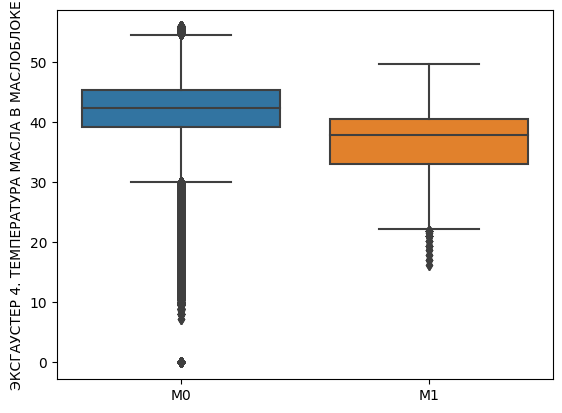

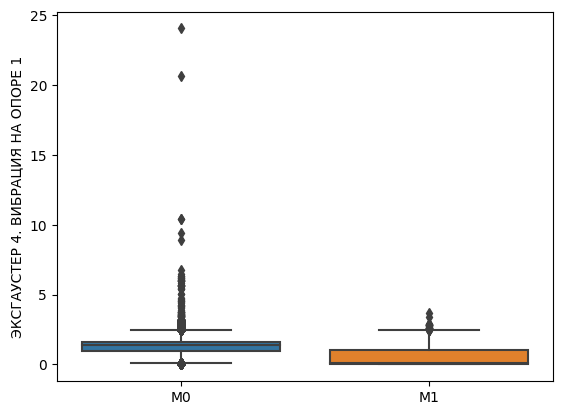

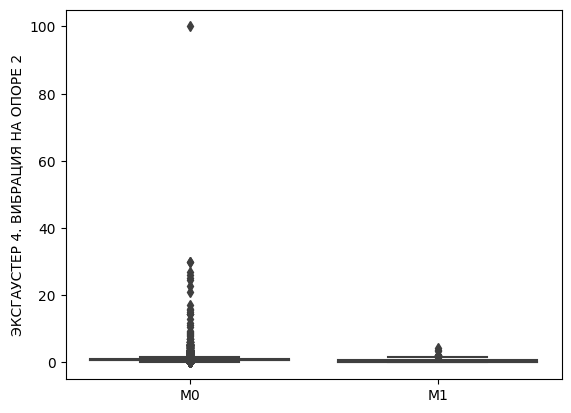

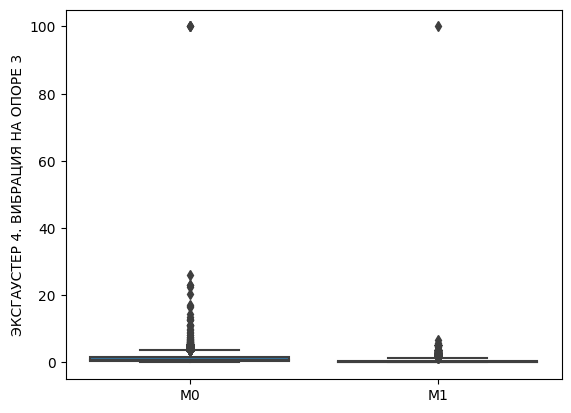

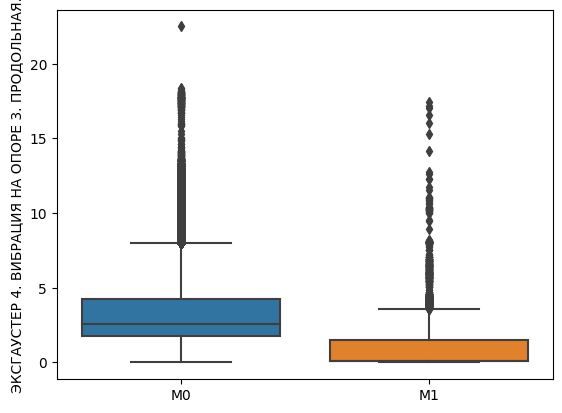

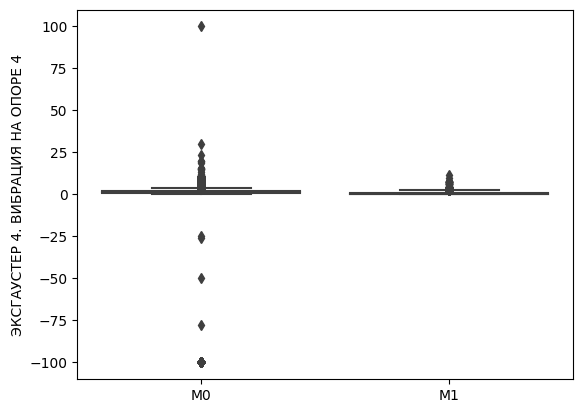

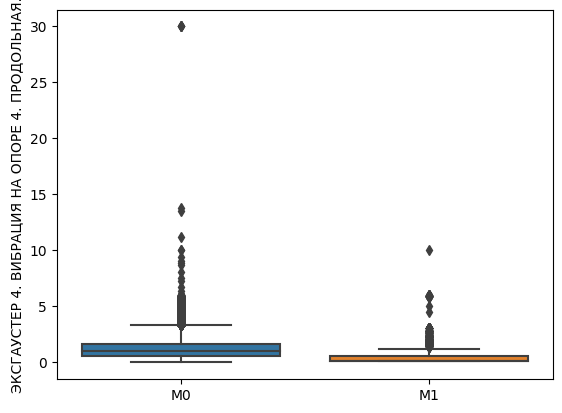

In [13]:
# Эксгаустер 4
plot_distribution(4, y_columns)

Заниженные значения параметров являются показателем остановки

M0 (9335034, 16)
M1 (589, 16)


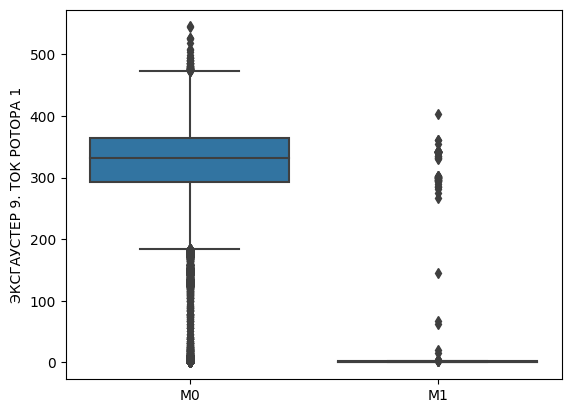

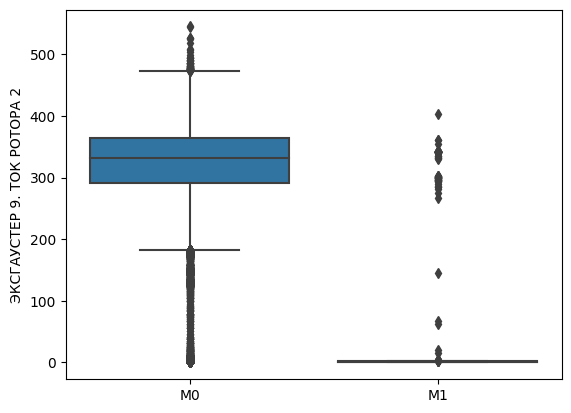

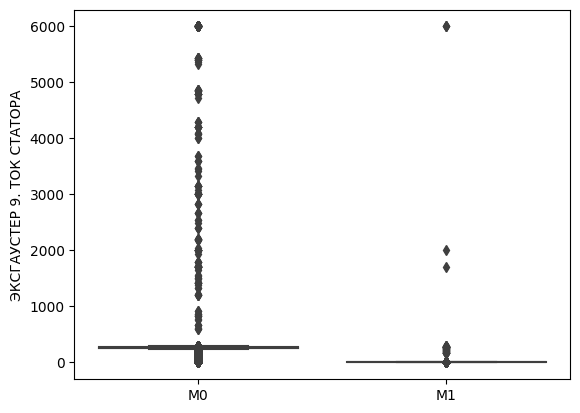

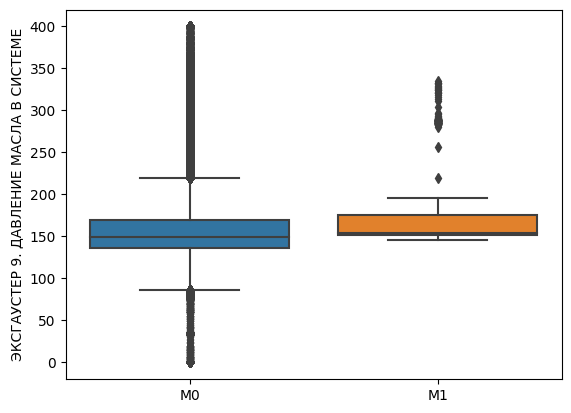

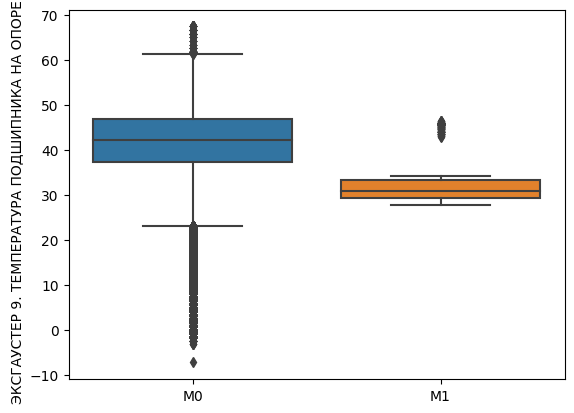

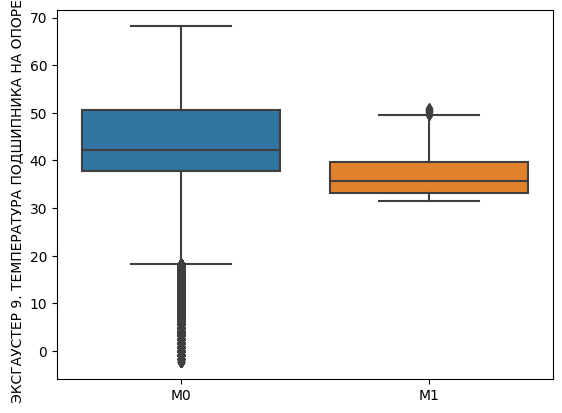

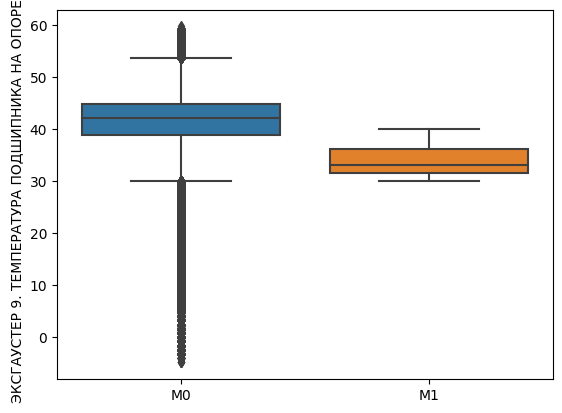

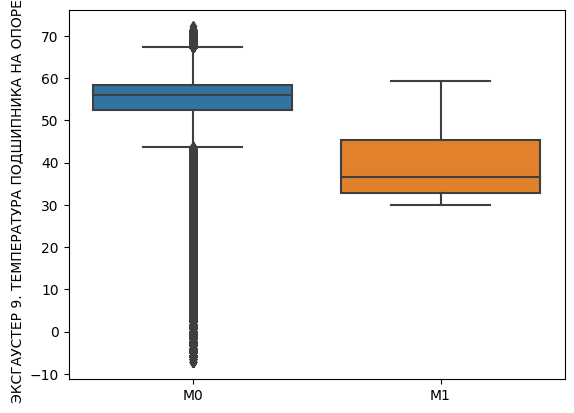

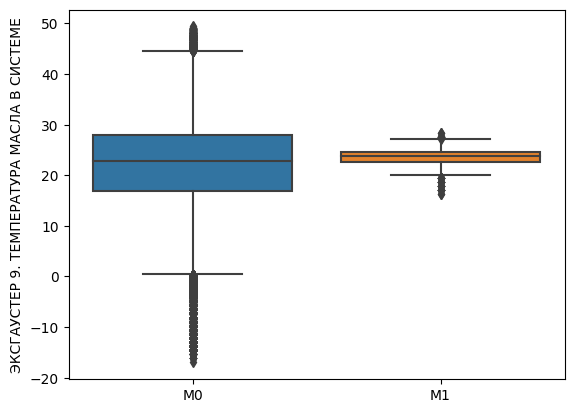

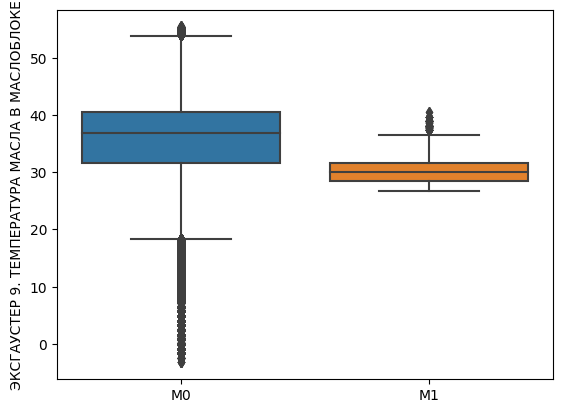

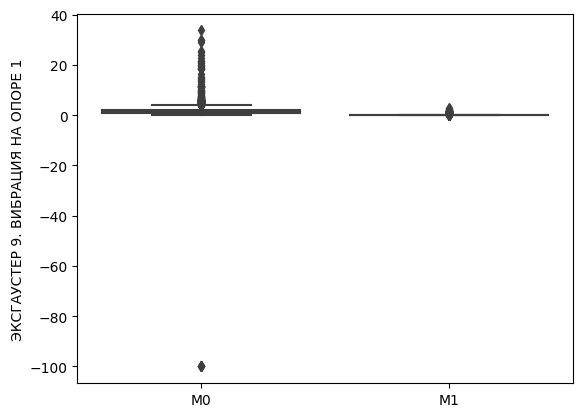

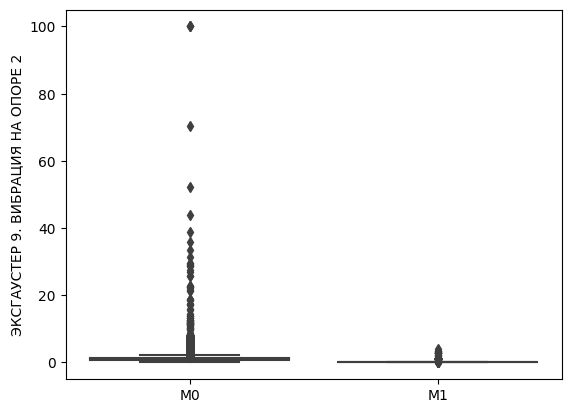

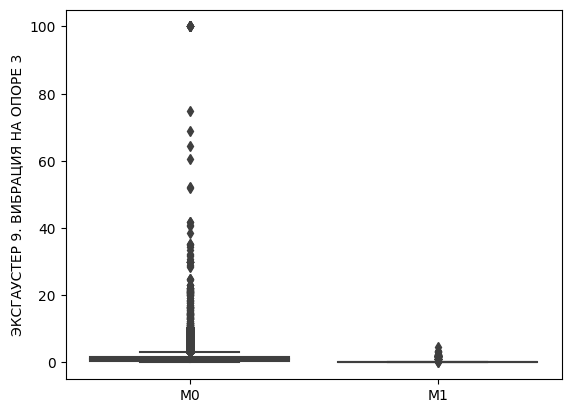

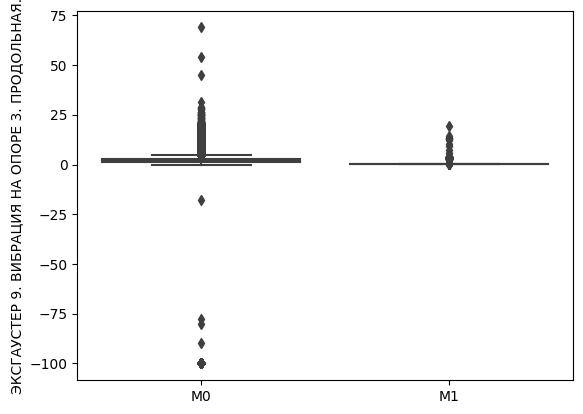

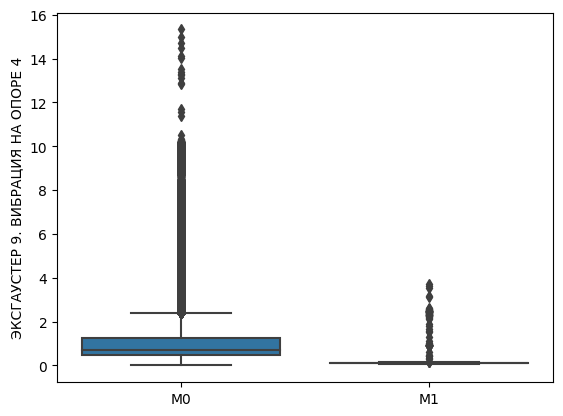

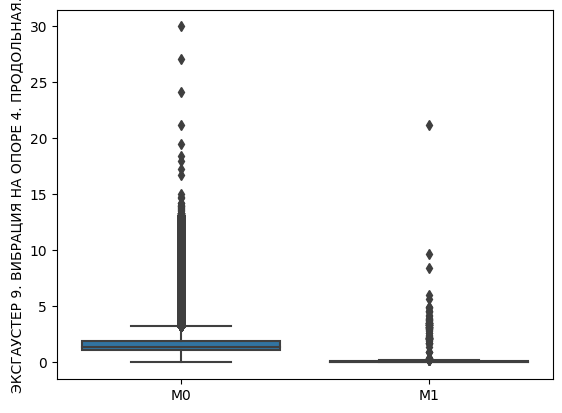

In [6]:
# Эксгаустер 9
plot_distribution(9, y_columns)